<a href="https://colab.research.google.com/github/dannnn30/data-mining-_-daniel/blob/main/%5BQuestion%5D_Exercise_Week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Library

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [4]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [5]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a clean dataset with total of 5 coulumns and no missing value.


### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-e5ea497ede2e>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


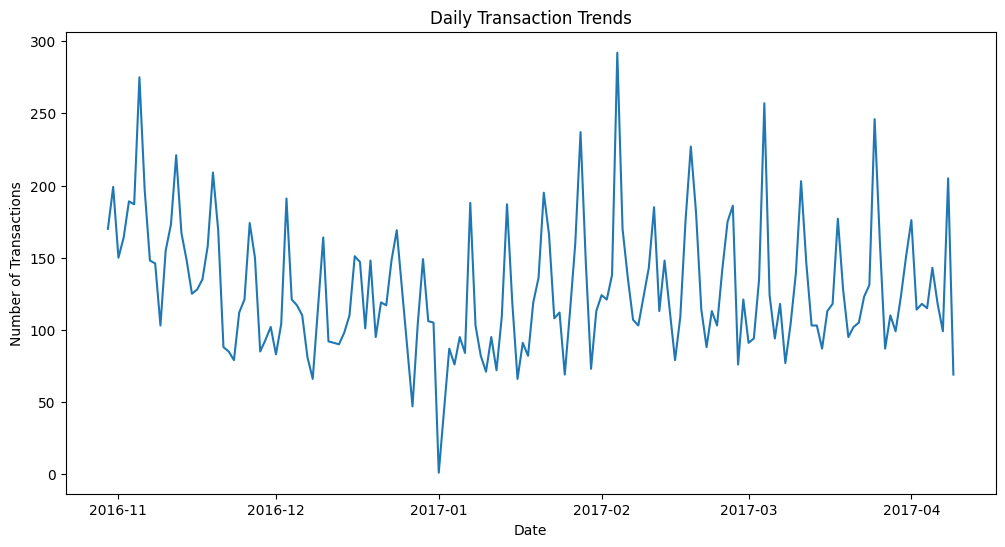

In [7]:
# 5
df['date_time'] = pd.to_datetime(df['date_time'])

df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour

daily_transactions = df.groupby('date')['Transaction'].count()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions.index, daily_transactions.values)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [8]:
# 6
df['day'] = df['date_time'].dt.day
df['day_name'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['hour'] = df['date_time'].dt.hour
df['time'] = df['date_time'].dt.time

ordered_columns = [
    "Transaction", "Item", "date_time", "period_day", "weekday_weekend",
    "day", "month", "year", "time", "hour", "day_name"
]
df = df[ordered_columns]
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
4323,2138,Sandwich,2016-11-26 14:14:00,afternoon,weekend,26,11,2016,14:14:00,14,Saturday
17369,8247,Coffee,2017-03-16 14:35:00,afternoon,weekday,16,3,2017,14:35:00,14,Thursday
11224,5593,Coffee,2017-01-29 12:22:00,afternoon,weekend,29,1,2017,12:22:00,12,Sunday
225,106,Pastry,2016-10-31 10:24:00,morning,weekday,31,10,2016,10:24:00,10,Monday
11867,5883,Tea,2017-02-03 16:06:00,afternoon,weekday,3,2,2017,16:06:00,16,Friday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


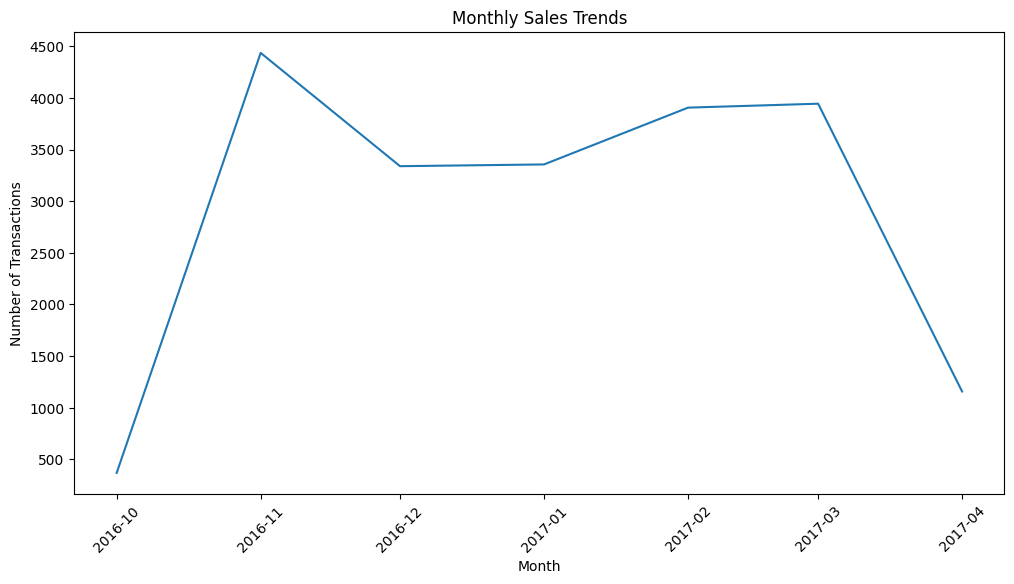

In [9]:
#7
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
monthly_sales = df.groupby(['year', 'month'])['Transaction'].count().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Transaction'])
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Sales Trends')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.show()

8. Now, the visualization above provides better insights: The visualization shows monthly transaction trends, with a sharp increase in November 2016, likely due to promotions or seasonal shopping. Transactions declined in December but stabilized from January to March 2017. However, there was a significant drop in April 2017, possibly due to seasonality or reduced demand, indicating clear seasonal patterns and the impact of promotions.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [10]:
#9
weekday_names = df[df['weekday_weekend'] == 'weekday']['date_time'].dt.day_name().unique()
weekend_names = df[df['weekday_weekend'] == 'weekend']['date_time'].dt.day_name().unique()

print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [11]:
#10
monthly_day_transactions = df.pivot_table(index='month', columns='day_name', values='Transaction', aggfunc='count', fill_value=0)
ordered_columns = [
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]
monthly_day_transactions = monthly_day_transactions[ordered_columns]
monthly_day_transactions = monthly_day_transactions.astype(int)
monthly_day_transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is the table shows that the highest transactions occur on weekends, particularly on Saturdays, as well as during busy months such as December and February due to the holiday season. Conversely, weekdays (Monday-Thursday) and months like April and October tend to have lower activity, requiring specific promotional strategies to boost sales.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


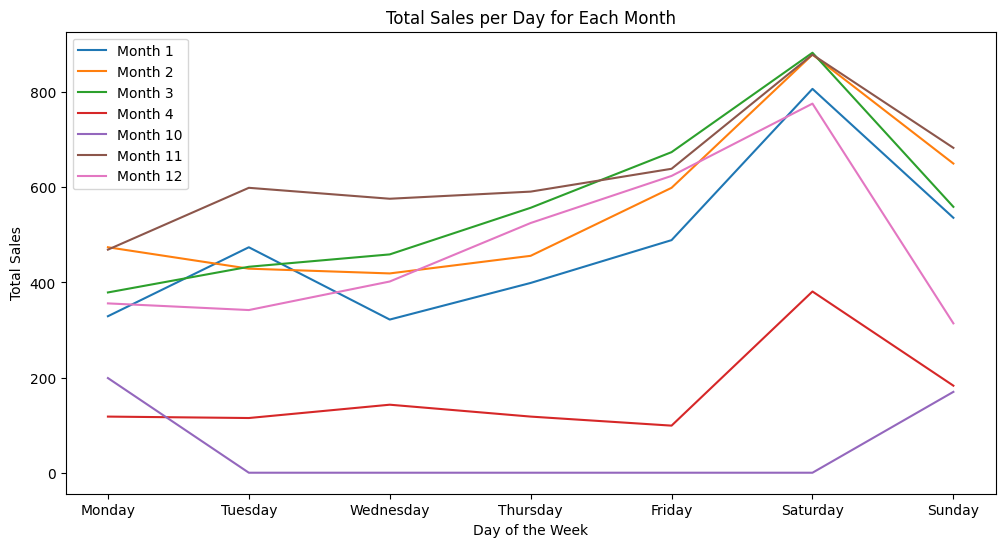

In [12]:
# 12
import matplotlib.pyplot as plt

monthly_day_transactions_transposed = monthly_day_transactions.T
plt.figure(figsize=(12, 6))
for month in monthly_day_transactions_transposed.columns:
    plt.plot(monthly_day_transactions_transposed.index, monthly_day_transactions_transposed[month], label=f'Month {month}')

plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales per Day for Each Month')
plt.legend()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that this visuals shows the total sales patterns by day of the week for each month. Across most months, there is a clear peak in sales on Saturdays, indicating that this is consistently the busiest day. Sundays also see relatively high sales for some months, though not as consistently as Saturdays.

Weekday sales vary by month, with some months (ex: November) showing more stable trends throughout the week, while others (ex: April) remain consistently low, suggesting a period of reduced activity or other influencing factors. The data for October highlights low or no activity during weekdays, with a spike on Sundays, possibly pointing to data collection gaps or unique patterns for this month.

Overall, the trend emphasizes the importance of weekends, especially Saturdays, for sales performance, which could guide strategies for resource allocation, marketing efforts, or promotions tailored to high-traffic days.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [13]:
# 14
days_name = df['period_day'].unique()
print(days_name)

['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [14]:
# 15
hour_ranges = df.groupby('period_day')['hour'].unique()
print(hour_ranges)

period_day
afternoon    [12, 13, 14, 15, 16]
evening          [17, 18, 19, 20]
morning      [9, 10, 11, 8, 7, 1]
night                [21, 23, 22]
Name: hour, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

in the "morning_hour" list, there is a 1 included, which is not typically a valid "morning hour." Normally, morning hours range from 6 AM to around 11 AM, but here we see 1 (which would correspond to 1 AM), which is technically the middle of the night.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


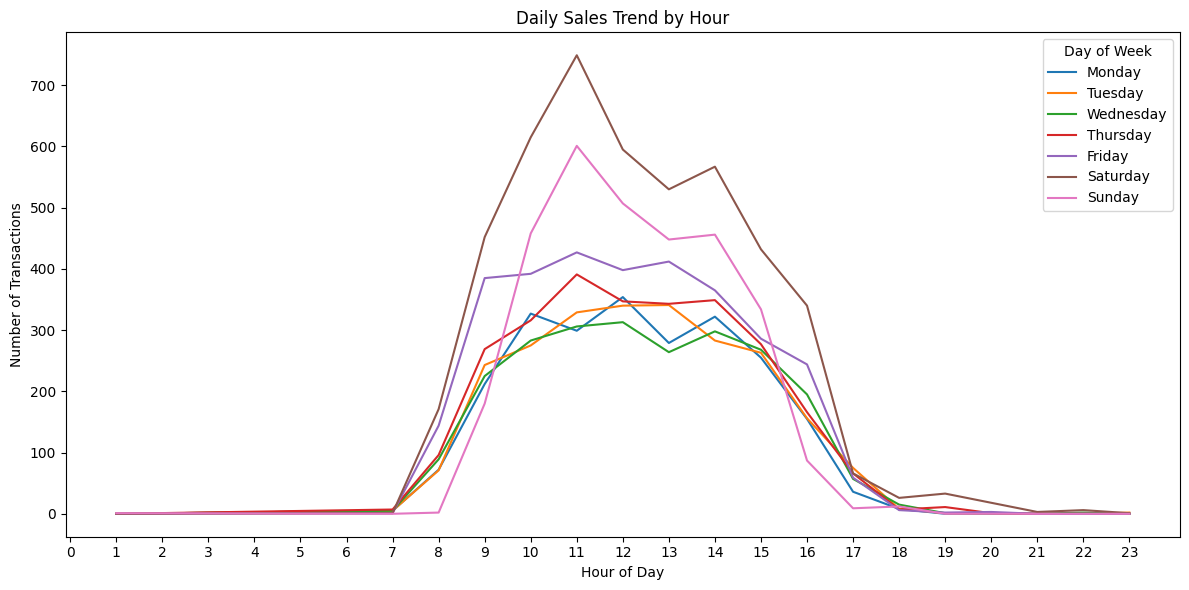

In [15]:
# 17
daily_hourly_sales = df.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()
daily_hourly_sales = daily_hourly_sales.pivot(index='hour', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_sales = daily_hourly_sales[days_order]
daily_hourly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Daily Sales Trend by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that The daily sales trend plot indicates a steady pattern throughout the week. Transactions begin to increase early in the morning (around 8 AM), reaching their highest point between late morning and early afternoon (10 AM to 2 PM), and then gradually decreasing as the day goes on, with a significant drop after 4 PM.

Saturdays are notable for having the highest transaction peaks, making it the busiest day of the week. Fridays and Sundays also experience relatively high activity, whereas midweek days like Tuesday and Wednesday have more moderate levels. This trend underscores the importance of allocating resources during peak hours, particularly on weekends, to optimize efficiency and sales.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


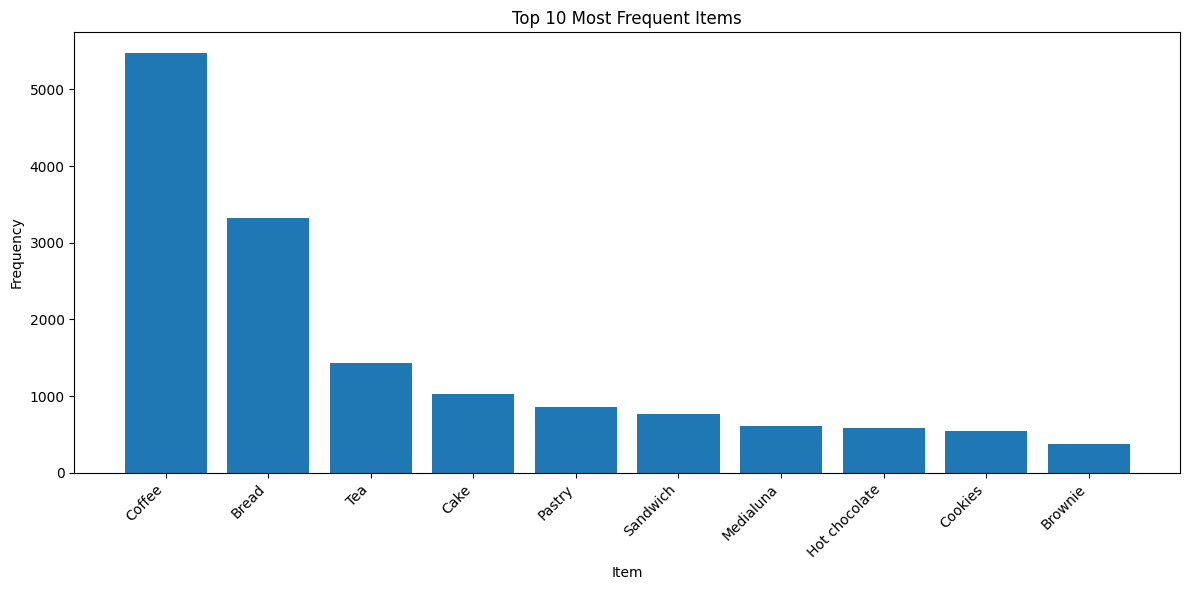

In [16]:
# 19
item_frequency = df.groupby('Item')['Transaction'].count().reset_index()
item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-99f836ba52a0>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


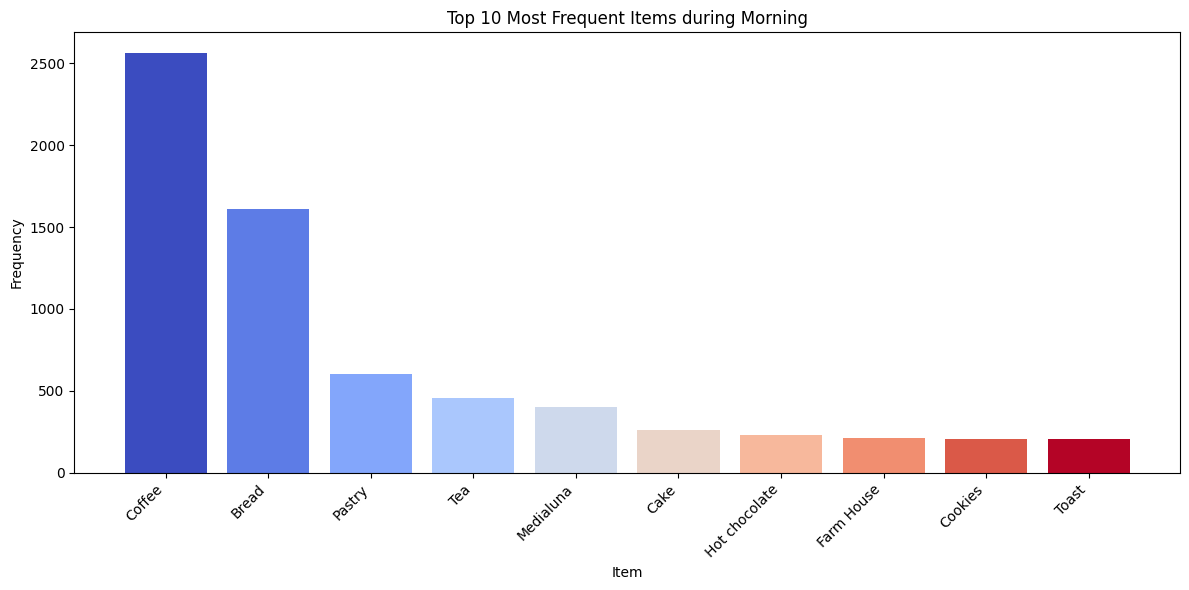

<ipython-input-17-99f836ba52a0>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


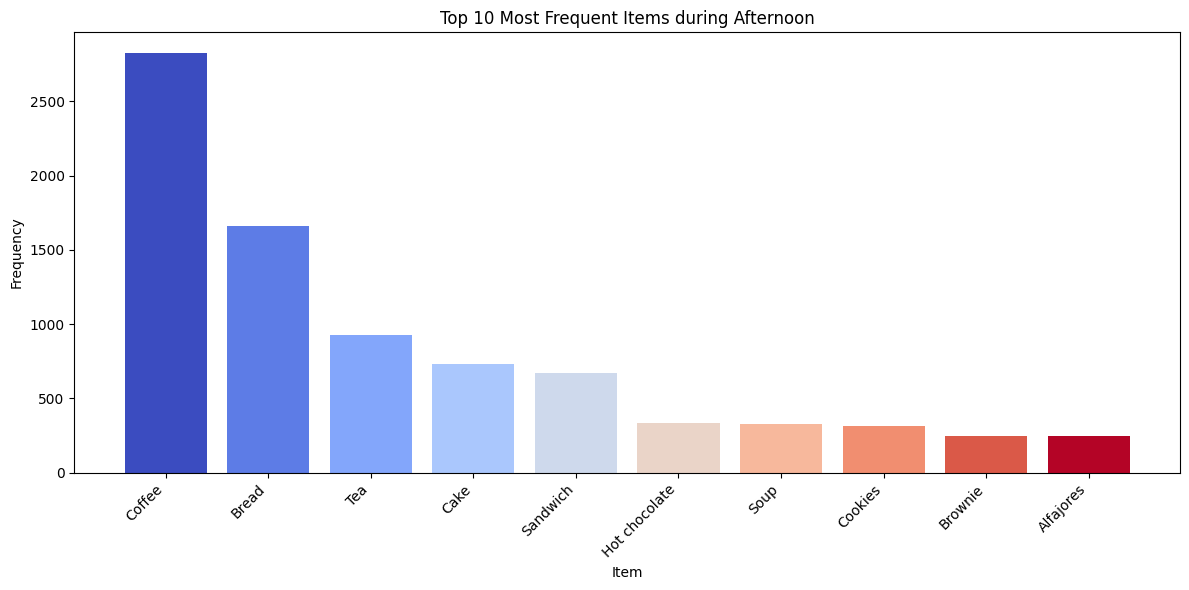

<ipython-input-17-99f836ba52a0>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


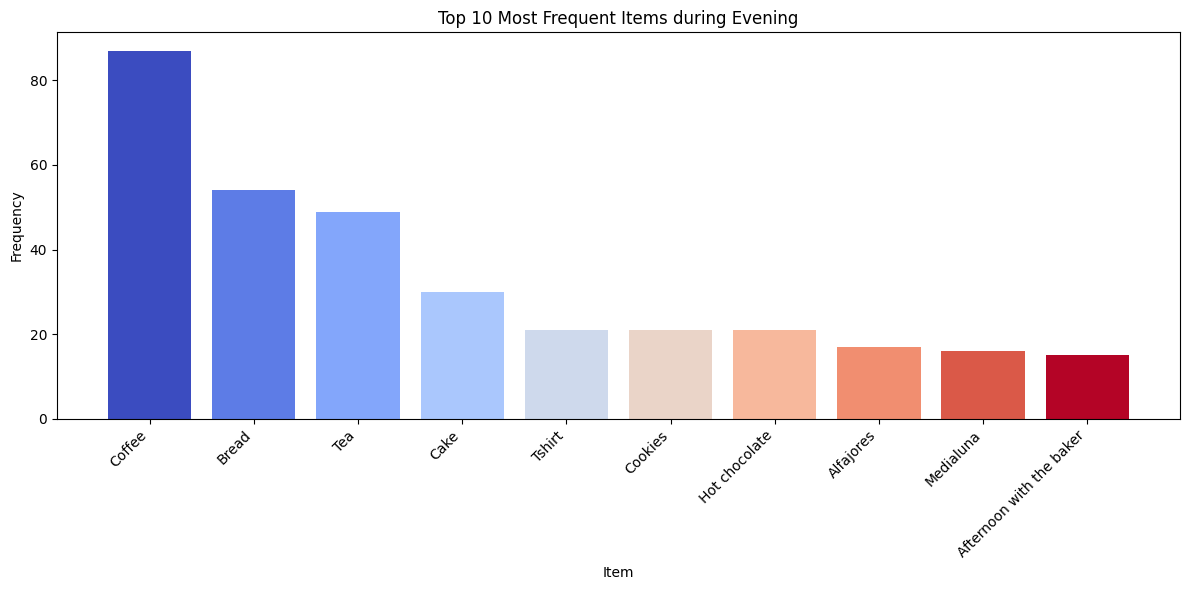

<ipython-input-17-99f836ba52a0>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))


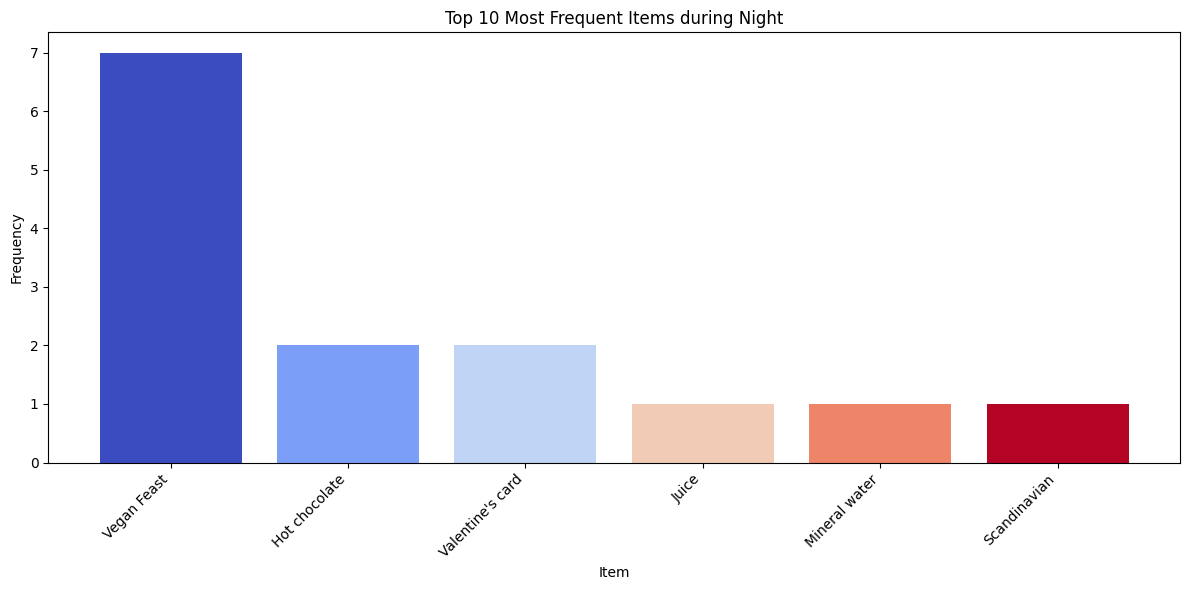

In [17]:
# 20
import matplotlib.cm as cm
def plot_top_items_by_period(period):
    period_data = df[df['period_day'] == period]
    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)
    plt.figure(figsize=(12, 6))
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10),
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Item')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Items during {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for period in df['period_day'].unique():
    plot_top_items_by_period(period)

21. It turns out that there is something different in the plot above, the insight is The visualization demonstrates distinct preferences in customer behavior during the night, with the Vegan Feast emerging as the most frequently chosen item, far surpassing other items such as Hot Chocolate, Valentine's Card, Juice, Mineral Water, and Scandinavian offerings. This preference suggests a strong demand for substantial and themed offerings during late hours.

Combining this insight with data from earlier times of the day:

Morning: Coffee dominates, followed by quick and light breakfast options such as bread, pastries, and tea, catering to customers seeking convenience and efficiency. Afternoon: While coffee remains popular, snacks and light meals such as tea, cake, and sandwiches gain traction, indicating a shift towards slightly heavier, more versatile offerings. Evening: Coffee still leads, complemented by indulgent and comforting items like hot chocolate and cookies, reflecting a preference for relaxation and satisfaction as the day winds down. By analyzing these trends, businesses can tailor their offerings effectively:

Provide breakfast combos featuring coffee, bread, and pastries in the morning. Introduce light meal bundles with sandwiches, tea, and snacks for the afternoon. Offer relaxing snack options such as hot chocolate and cookies in the evening. Highlight specialized night items like the Vegan Feast to capture the unique nighttime demand. This time-sensitive strategy could maximize customer satisfaction and boost sales throughout the day.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


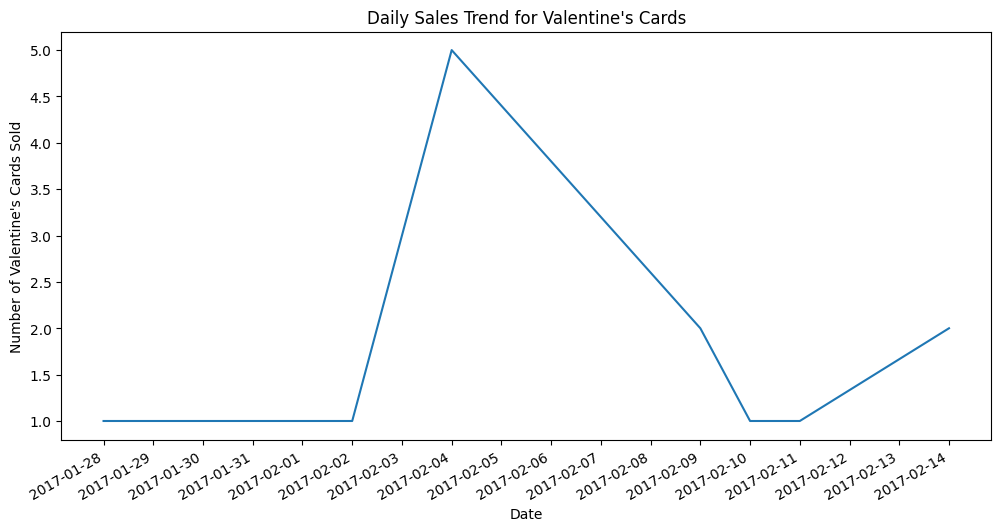

In [18]:
#22
valentines_card_transactions = df[df['Item'] == "Valentine's card"]
valentines_sales_by_date = valentines_card_transactions.groupby(valentines_card_transactions['date_time'].dt.date)['Transaction'].count()
plt.figure(figsize=(12, 6))
plt.plot(valentines_sales_by_date.index, valentines_sales_by_date.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Valentine\'s Cards Sold')
plt.title('Daily Sales Trend for Valentine\'s Cards')
plt.show()

23. I found the insight from the sale of the Valentine's cards above is The sales trend for Valentine’s cards reveals a consistent but low rate of sales from late January through early February, followed by a sharp rise starting around February 2nd and peaking on February 5th with over 5 cards sold daily. After this peak, sales gradually decrease, hitting their lowest levels on February 10th and 11th. Interestingly, there is a minor surge in sales as Valentine’s Day approaches, indicating a last-minute rush from late buyers. Overall, the highest demand is observed approximately 10 days before Valentine’s Day.


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [19]:
# 24
df['Quantity'] = df.groupby(['Transaction', 'Item'])['Item'].transform('count')
df = df.drop_duplicates(subset=['Transaction', 'Item'])
transaction_data = df.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#25

# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-61588530e194>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [21]:
# 26
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [22]:
# 27
requent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Transaction Trends: Daily transaction trends show that the bakery has peak sales on weekends (Saturday and Sunday), which is consistent with people having more leisure time during weekends and enjoying baked goods as part of their weekend routines. The bakery tends to be busiest between 10 am and 12 pm. This suggests that customers often visit the bakery for a mid-morning or lunchtime snack or to pick up bread for their meals. Sales generally increase towards the end of the year, potentially influenced by holiday seasons and celebrations.

Item Popularity: The most popular items are Coffee, Bread, and Tea. This highlights the bakery's core offerings and customer preferences for these basic staples. The popularity of items like Coffee, Bread, Tea, and Pastry is consistent across all periods (morning, afternoon, evening, night). This suggests that customer preferences for these items are not influenced by the time of the day.However, during the afternoon, the sales of items like Cookies, Hot Chocolate, and Cakes are relatively high, indicating that these items are favored for afternoon treats or snacks.Valentine's cards showed a peak in sales during February, particularly around February 14th (Valentine's Day), which is expected given the nature of the item.

Item Associations (Apriori Algorithm): The Apriori algorithm revealed associations between items that are frequently purchased together. For example, Coffee and Toast are often purchased together, as indicated by their high lift value. Other associations include Coffee with Medialuna, Pastry, and Cake. This could assist in creating bundled offers or promotions that encourage the purchase of these items together. Recommendations

Based on these insights, here are some recommendations for the bakery:

Staffing and Inventory: Optimize staffing levels and inventory management to accommodate the higher demand during peak hours (10 am to 12 pm) and weekends.

Promotional Strategies: Consider offering bundled deals or discounts for popular item combinations, such as Coffee and Toast, to further encourage these purchases.

Product Focus: Emphasize the core offerings like Coffee, Bread, Tea, and Pastry, while ensuring adequate supply to meet consistent demand. Seasonal and Special Occasions: Leverage seasonality and special occasions like Valentine's Day with targeted marketing campaigns and product offerings to increase sales.

Afternoon Treats: Promote items like Cookies, Cakes, and Hot chocolate during the afternoon to cater to customers looking for afternoon treats.